In [2]:
import numpy as np
import torch
import awkward
import pickle
import matplotlib.pyplot as plt

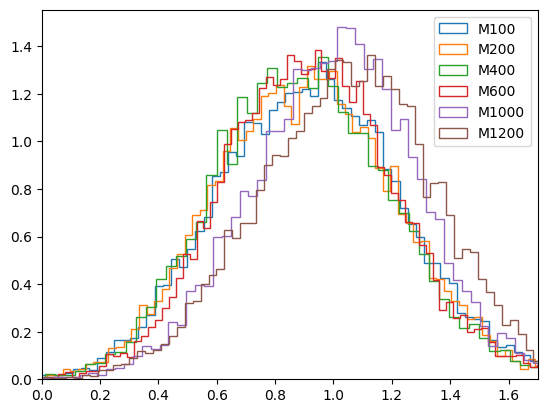

In [10]:

pred1 = np.array(np.load("predaodM100.pickle",allow_pickle=True))
pred2 = np.array(np.load("predaodM200.pickle",allow_pickle=True))
pred3 = np.array(np.load("predaodM400.pickle",allow_pickle=True))
pred4 = np.array(np.load("predaodM600.pickle",allow_pickle=True))
pred5 = np.array(np.load("predaodM1000.pickle",allow_pickle=True))
pred6 = np.array(np.load("predaodM1200.pickle",allow_pickle=True))
file = open("trueE_target.pickle",'rb')
true = pickle.load(file).to_numpy()
plt.xlim((0,1.7))
plt.hist(pred1,histtype='step',bins=100,label="M100",density=True)
plt.hist(pred2,histtype='step',bins=100,label="M200",density=True)
plt.hist(pred3,histtype='step',bins=100,label="M400",density=True)
plt.hist(pred4,histtype='step',bins=100,label="M600",density=True)
plt.hist(pred5,histtype='step',bins=100,label="M1000",density=True)
plt.hist(pred6,histtype='step',bins=100,label="M1200",density=True)
plt.legend()

In [3]:

file=open("all_trainidx.pickle",'rb')
tidx=pickle.load(file)
file=open("all_valididx.pickle",'rb')
vidx=pickle.load(file)
predv=pred[vidx]
predt=pred[tidx]
truev=true[vidx]
truet=true[tidx]
print(truev)
predv

[1.28996596 0.828991   0.72241495 ... 1.18287368 1.98174831 1.1690703 ]


array([1.21608639, 1.04392803, 0.83834821, ..., 1.02682889, 1.96943963,
       1.21614361])

In [4]:
from scipy.optimize import curve_fit
import seaborn as sns
fitfunc = lambda x,m,c : m*x +c
params, cov = curve_fit(fitfunc,pred,true)
cov

array([[ 1.66132419e-07, -1.75942757e-07],
       [-1.75942757e-07,  2.35230452e-07]])

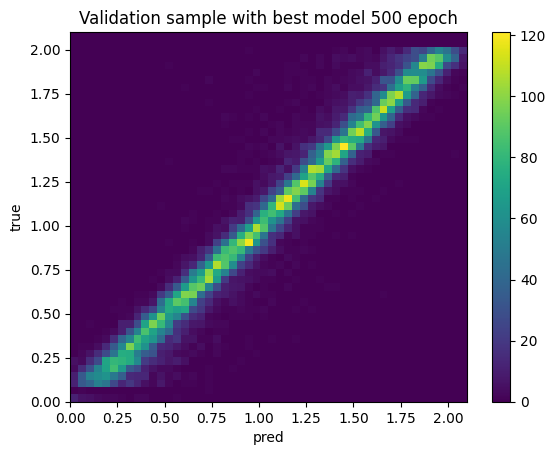

In [5]:

title="Validation sample with best model 500 epoch"
fig,axs=plt.subplots()
h = axs.hist2d(predv,truev,range=[[0,2.1],[0,2.1]],bins=50) 
fig.colorbar(h[3],ax=axs)
plt.xlabel("pred")
plt.ylabel("true")
#plt.plot(pred,fitfunc(pred,params[0],params[1]),color='red',label='fit('+'m='+str(params[0].round(2))+', c='+str(params[1].round(2))+')')
#plt.legend()
plt.title(title)
plt.savefig("predvstrue.png")

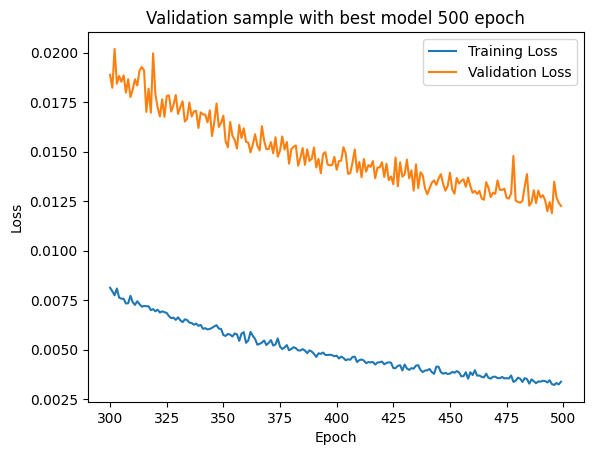

In [6]:
s = np.load("summaries.npz")
tloss=s['train_loss']
vloss=s['valid_loss']
epoch=s['epoch'] + 300
plt.plot(epoch,tloss,'-',label="Training Loss")
plt.plot(epoch,vloss,'-',label="Validation Loss")
plt.title(title)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.savefig("loss.png")
plt.legend()

In [7]:
import ROOT

Welcome to JupyROOT 6.28/00


In [8]:
c1 = ROOT.TCanvas("c1","Profile histogram",200,10,700,500)
hprof  = ROOT.TProfile("hprof","Profile of M_true versus M_pred;M_true;M_pred",100,0.1,2.1,0.1,2.1)
for i in range(len(true)):
    hprof.Fill(true[i],pred[i])
hprof.Draw()
c1.Update()
st = hprof.FindObject("stats")
st.__class__ = ROOT.TPaveStats
st.SetX1NDC(0.7)
st.SetX2NDC(0.9)
st.SetY1NDC(0.3)
st.SetY2NDC(0.5)
c1.SaveAs("tprofile.pdf")

Info in <TCanvas::Print>: pdf file tprofile.pdf has been created


In [10]:
from ROOT import TFile
from ROOT import TH1F
from ROOT import TCanvas
from ROOT import TPaveStats
from ROOT import TLegend
import numpy as np

m_predM900 = TH1F("m_pred900", "M Predicted M900", 100, 0, 2)
m_predM900.SetLineColor(1)
m_predM900.SetLineWidth(2)
m_predM900.SetLineStyle(1)
m_predM1200 = TH1F("m_pred1200", "M Predicted M1200", 100, 0, 2)
m_predM1200.SetLineColor(2)
m_predM1200.SetLineWidth(2)
m_predM1200.SetLineStyle(1)
m_predM600 = TH1F("m_pred600", "M Predicted M600", 100, 0, 2)
m_predM600.SetLineColor(3)
m_predM600.SetLineWidth(2)
m_predM600.SetLineStyle(1)
m_predM600_v1 = TH1F("m_pred600_v1", "M Predicted M600", 100, 0, 2)
m_predM600_v1.SetLineColor(4)
m_predM600_v1.SetLineWidth(2)
m_predM600_v1.SetLineStyle(1)
canvas = TCanvas("combined", "combined", 1200, 600)
pred900 = np.load("predvM900.pickle", allow_pickle=True)
pred1200 = np.load("predvM1200.pickle", allow_pickle=True)
pred600 = np.load("predt_binwidth_0.2_M600.pickle", allow_pickle=True)
pred600_v1 = np.load("predvM600.pickle", allow_pickle=True)
# energies = np.load("totalRechitEnergies.pickle", allow_pickle=True)
# pred = [i - 15 / 16 * mean_pred for i in pred]
# gen = [i - 15 / 16 * mean_gen for i in gen]
for i in range(len(pred900)):
    m_predM900.Fill(pred900[i])
for i in range(len(pred1200)):
    m_predM1200.Fill(pred1200[i])
for i in range(len(pred600)):
    m_predM600.Fill(pred600[i])
for i in range(len(pred600_v1)):
    m_predM600_v1.Fill(pred600_v1[i])
legend = TLegend(0.75, 0.25, 0.9, 0.4)
legend.SetHeader("", "C")
legend.AddEntry(m_predM600_v1, "M Predicted M600 200 bw", "l")
legend.AddEntry(m_predM600, "M Predicted M600 400 bw", "l")
#legend.AddEntry(m_predM900, "M Predicted M900", "l")
#legend.AddEntry(m_predM1200, "M Predicted M1200", "l")
canvas.cd()

canvas.Modified()
canvas.Update()
#m_predM1200.Draw("same")
#m_predM900.Draw("same")
m_predM600.Draw("same")
m_predM600_v1.Draw("same")



legend.Draw("same")
m_predM900.Write()
m_predM1200.Write()
m_predM600.Write()

canvas.Write()
canvas.SaveAs("combined.root")

Warning in <TROOT::Append>: Replacing existing TH1: m_pred900 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: m_pred1200 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: m_pred600 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: m_pred600_v1 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: combined
Error in <TROOT::WriteTObject>: The current directory (PyROOT) is not associated with a file. The object (m_pred900) has not been written.
Error in <TROOT::WriteTObject>: The current directory (PyROOT) is not associated with a file. The object (m_pred1200) has not been written.
Error in <TROOT::WriteTObject>: The current directory (PyROOT) is not associated with a file. The object (m_pred600) has not been written.
Error in <TROOT::WriteTObject>: The current directory (PyROOT) is not associated with a file. The object (combined) has not been written.
Info in <TCanvas

In [10]:
import ROOT
canvas = TCanvas("fitting", "fitting", 1200, 600)
canvas.cd()
t = ROOT.RooRealVar("t", "t", 0.4, 0.8)
dh = ROOT.RooDataHist("dh", "dh", [t], Import=m_predM600)
m0 = ROOT.RooRealVar("mean_bw", "mean bg", 91, 0, 200)
sg = ROOT.RooRealVar("sigma_bw", "sigma bg", 10.27, 0.1, 20)
bw = ROOT.RooBreitWigner("bw", "bw", t, m0, sg)
bw.fitTo(dh)

frame = t.frame(Title="BW fit on M600")
dh.plotOn(frame)
bw.plotOn(frame)
bw.paramOn(frame)
frame.GetYaxis().SetTitleOffset(1.4)
frame.Draw()

canvas.Write()
canvas.SaveAs("fitting.root")

[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 mean_bw      9.10000e+01  2.00000e+01    0.00000e+00  2.00000e+02
     2 sigma_bw     1.02700e+01  1.99000e+00    1.00000e-01  2.00000e+01
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **    6 **MIGRAD        1000           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE WHEN EDM .LT. 1.00e-03
 FCN=-349.094 FROM MIGRAD    STATUS=INITIATE       53 CALLS          54 TOTAL
                     EDM= unknown      STRATEGY= 1      NO E

Error in <TROOT::WriteTObject>: The current directory (PyROOT) is not associated with a file. The object (fitting) has not been written.
Info in <TCanvas::SaveAs>: ROOT file fitting.root has been created


In [11]:
len(pred600)

970